# Цели исследования
1. Изучить и приоритезирвоать гиппотезы.
2. Запустить A/B-тест и проанализирвоать его резхультаты.

# Ход исследования

**Часть 1.  Приоритизация гипотез:**
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста:**
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.    Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

<a name="stage_1"></a>
# Часть 1. Приоритезация гипотез

In [1]:
#Выгрузим библиотеки которые могут понадобиться в ходе исследования:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np


In [2]:
#загружаем и читаем датафрейм
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

#посмотрим на данные:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проведём стандартные проверки на дубликаты и тип данных в колонках.

In [4]:
hypothesis.duplicated().sum()

0

In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

<div class="alert alert-success">
<b>Комментарий от ревьюера:</b> Хорошо, что ты не забываешь проверить данные.

</div>

Вывод:

Исправлять нчиего не нужно. С данными можно работать.

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета**

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000


**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [7]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

Главное меняется тройка лидеров : если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятыю позицыию, в то время как 2 перешел на второе место с пятого. Такое отличие продиктовано, тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный! А в 2 он =8,тоже высокий, а в лидере ICE - в 8 он минимальный =1). Поэтому надо предложить для тестирования гипотезу №7 и возможно еще №2*

<a name="stage_1"></a>
# Часть 2. Анализ A/B-теста

In [8]:
#Прочтём и посомтрим на оставшиеся два датафрейма:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#Посмотрим на дубликаты и тип данных.
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Данные в поярдке, но вот дата в типе object. Это надо испарвить.

In [16]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

#И проверяем:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные подготовлены к работе с ними. 

И теперь подготовим их для анализа: - соберём данные в группу, посчитатем куммулятивные суммы и т.д.

In [17]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()


In [18]:
# Сумма визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# куммулятивная сумма
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [19]:
#Смотрми что получилось:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


Всё сделано, можно приступать к анализу по заданию

**1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения**

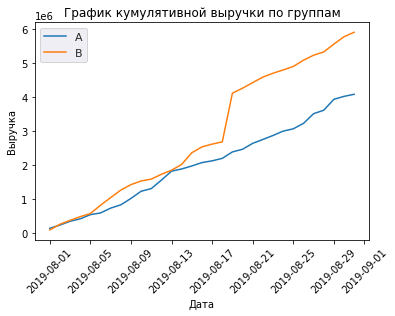

In [20]:
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date','revenue']]
cumulativeRevenueB = cummulative[cummulative['group']=='B'][['date','revenue']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})


plt.title('График кумулятивной выручки по группам')

plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.legend() 
plt.show()

В группе B наблюдается резкий скачёк. Возможно это влияние аномалий. Тем не менее, она показыввает больгий рост чем группа А.

**2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

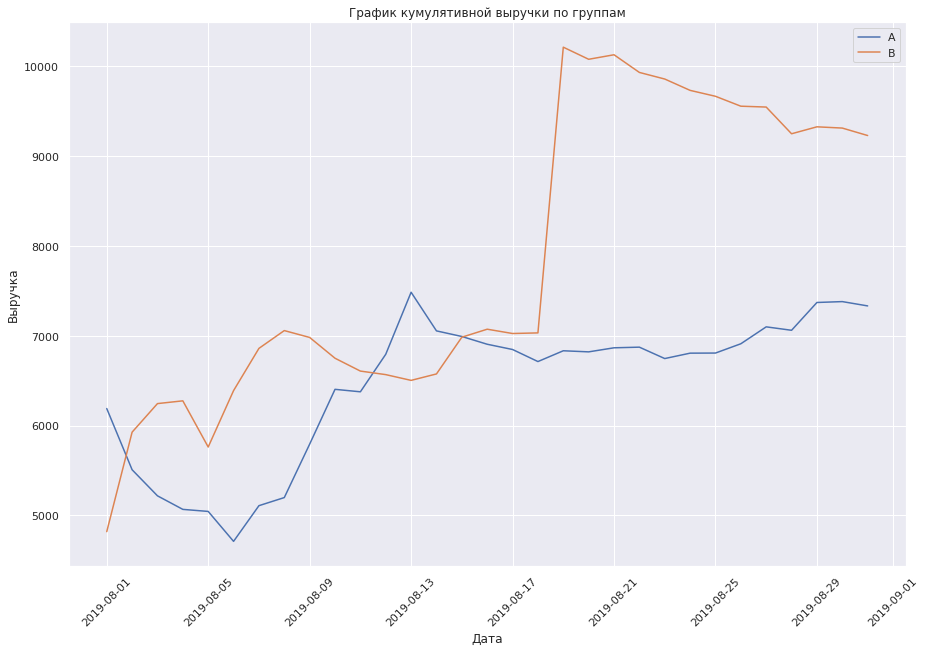

In [21]:
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date','average_check']]
cumulativeRevenueB = cummulative[cummulative['group']=='B'][['date','average_check']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['average_check'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['average_check'], label='B')

plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.title('График кумулятивной выручки по группам')

plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.legend() 
plt.show()

Картина та же что и на предыдущем графике: группа B подскакивает, затем снижается, но по уровню всё также выше чем группа А

**3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

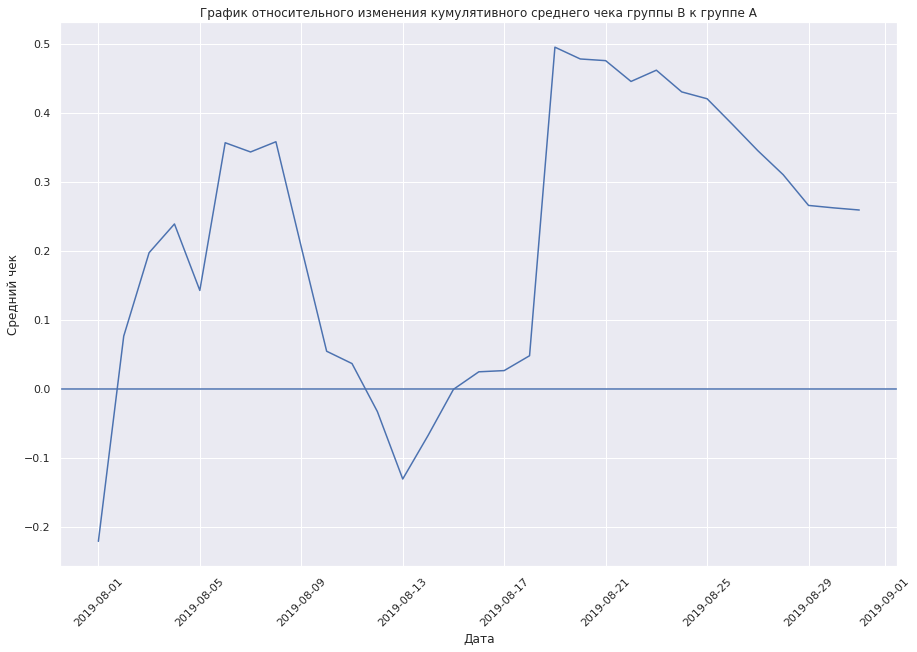

In [22]:
temp = (cumulativeRevenueA[['date', 'average_check']].merge(cumulativeRevenueB[['date', 'average_check']],\
                                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0)

plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.show()

Чек в группе В сначала рос, затем резко просел 13 августа, затем снвоа пошёл в рост., затем примерно с 18 августа резкий посдкок, который отмечался и на предыдущих графиках, затем снова плавный спад. Картина, в целом, одна и та же.

**4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**


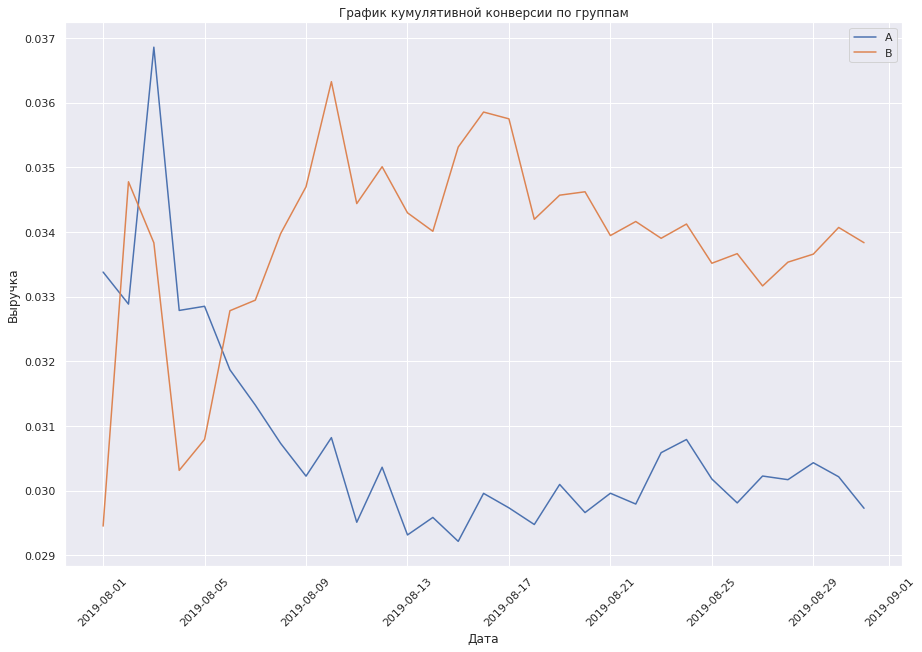

In [23]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]

plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')

plt.title('График кумулятивной конверсии по группам')


plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.legend()
plt.show()

Вначале у обоих групп происходит пиковый скачёк, затем у группы А среднее количество заказов колеблется в районе в районе 0,029 и до 0,031. У группы В среднее количество заказов колеблется от 0,037 и до 0,033. и выглядет лучшем чем у гурппы А.

**5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

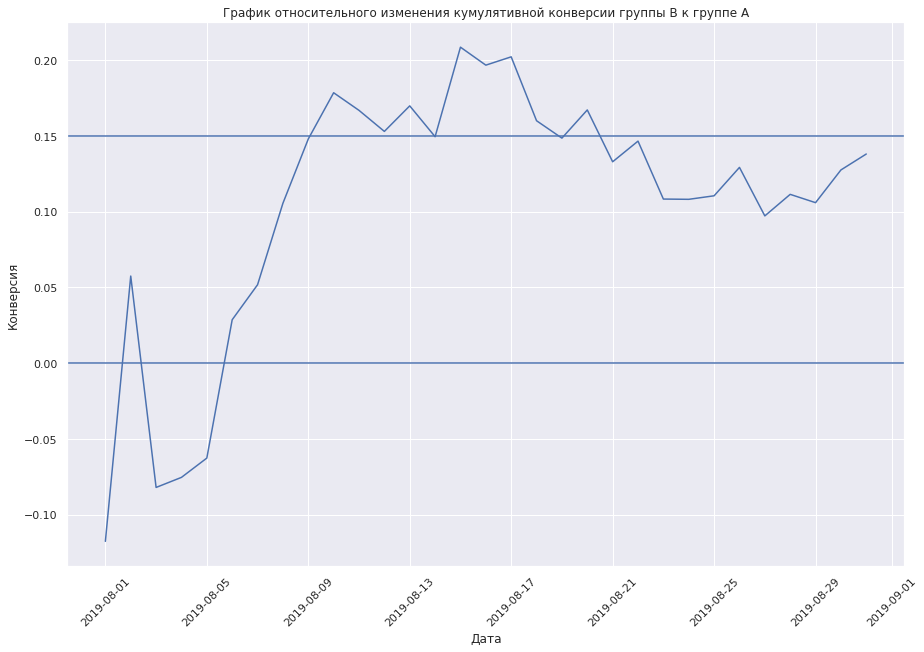

In [24]:
izmen = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(izmen['date'], izmen['conversion_B'] / izmen['conversion_A']-1)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0)
plt.axhline(y=0.15)

plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.show()

Стоит отметить не большоей колчиество дней теста, но на этом промежутке группа В выглядит хорошо. 

**6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

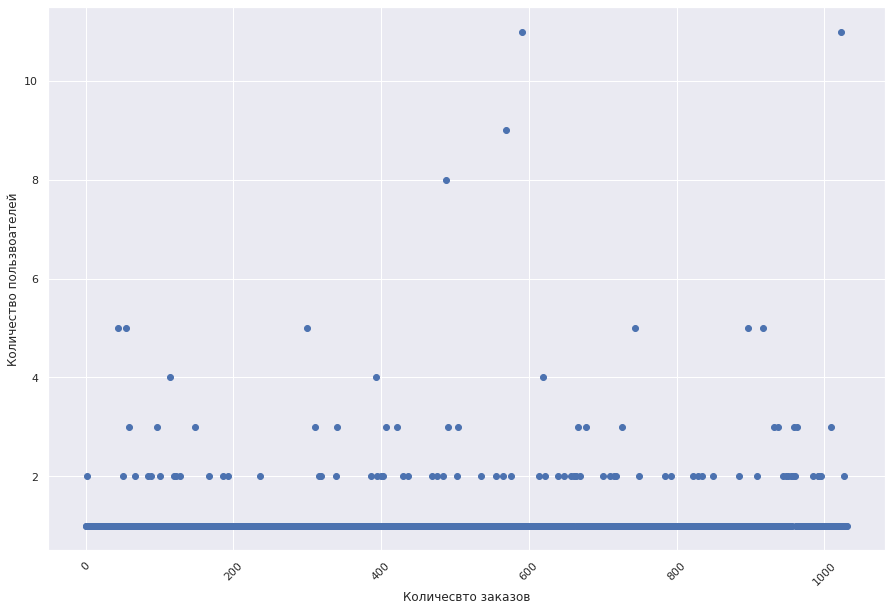

In [25]:
orders_pers_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})

x_values = pd.Series(range(0,len(orders_pers_users['orders'])))
plt.scatter(x_values, orders_pers_users['orders'])

plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.xlabel('Количесвто заказов')
plt.ylabel('Количество пользвоателей')

plt.show()

По этимоу графику видно, что большинство покупок совершается 1 раз, но етсь и т кто совершают больше однйо покупки.

**7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [26]:
print('95 перцентиль: %.2f' % (np.percentile(orders_pers_users['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_pers_users['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


In [27]:
orders_pers_users['orders'].max()

11

In [28]:
np.ptp(orders_pers_users['orders'], axis=0)

10

In [29]:
pers = np.percentile(orders_pers_users['orders'], [99])
pers = float(pers)
print(pers)

4.0


In [30]:
outlaws = orders_pers_users[orders_pers_users['orders'] >= pers]['visitor_id'].to_list()

Лучше всего считать аномалиями всё что за 99 перцентилем.

**8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

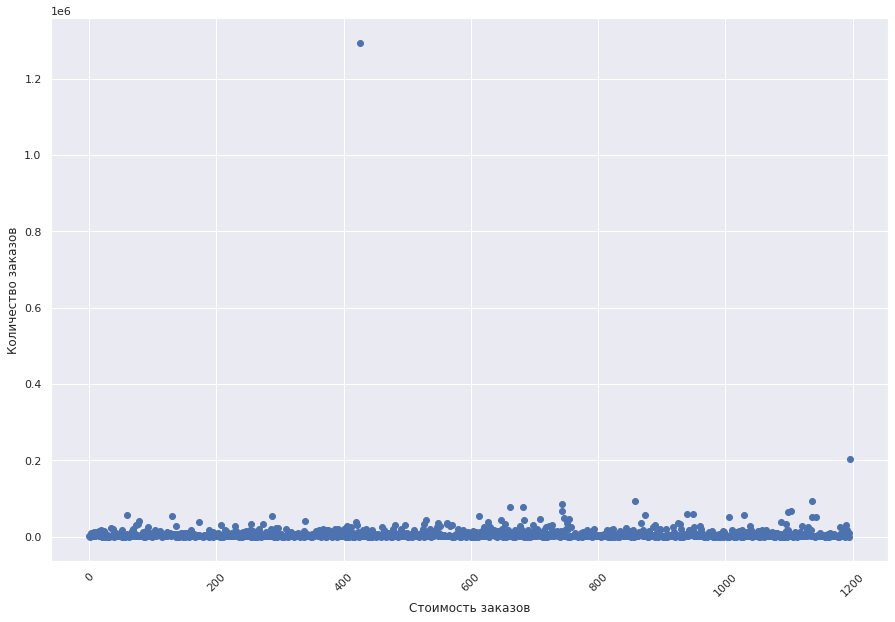

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15, 10)})

plt.xlabel('Стоимость заказов')
plt.ylabel('Количество заказов')

plt.show()

Все заказы в районе одной суммы. При этмо наблюдаются две точки - заказа с болшей стоимостью, по всей видимости, это аноммалии.

**9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [32]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [33]:
orders['revenue'].max()

1294500

In [34]:
np.ptp(orders['revenue'], axis=0)

1294450

Так же как и в предыдущем случае лучше всего остекать всё что за 99 перцентилем - это анмоалии.

**10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Определим гипотезы:

H0: Среднее количество заказов в группе A РАВНО среднему колчиеству заказов в группе B

H1: Среднее количество заказовв группе A НЕ РАВНО среднему колчиеству заказов в группе B

- alpha берётся 0.05
- Используется напараметрический тест Уилкоксона-Манна-Уитни с методом st.mannwhitneyu(), с помощью него сможем проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки с учётом выбросов, которые имеются в данных. Также отмечу, что сам тест работает с рангами, не учитывая сами значения.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


Статистическая значимость есть, т.к. заказов в группе В значительно больше.

**11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Гипотезы:

H0: Средний чек A равен среднему чеку группы B

H1: Средний чек A не равен среднему чеку группы B

- alpha берётся 0.05
- Используется напараметрический тест Уилкоксона-Манна-Уитни с методом st.mannwhitneyu(), с помощью него сможем проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки с учётом выбросов, которые имеются в данных. Также отмечу, что сам тест работает с рангами, не учитывая сами значения.

In [37]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительные различия: 0.259


In [38]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [39]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

Нулевую гепотизу не удалось отвергнуть. В гуррпе В среднйи чек не превосходит  среднйи чек в группе А. Это показывает и статичтическая значимость.

**12.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Затем проверим гипотезы:

H0: Среднее колчиество заказов в группе A РАВНО среднему количеству заказов в группе B

H1: Среднее колчиество заказов в группе A НЕ РАВНО среднему количеству заказов в группе B

- alpha берётся 0.05
- - Используется напараметрический тест Уилкоксона-Манна-Уитни с методом st.mannwhitneyu(), с помощью него сможем проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки с учётом выбросов, которые имеются в данных. Также отмечу, что сам тест работает с рангами, не учитывая сами значения.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > pers]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > pers]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.019
Относительные различия: 0.144


Статистчиески подтверждается что количество заказов группы В не равна количеству заказов группы А.

**13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [42]:
pers_1 = np.percentile(orders['revenue'],99)

orders_clear = orders.query('revenue <= @pers_1')


Гипотезы:

H0: Средний чек A равен среднему чеку группы B

H1: Средний чек A не равен среднему чеку группы B

- alpha берётся 0.05
- Используется напараметрический тест Уилкоксона-Манна-Уитни с методом st.mannwhitneyu(), с помощью него сможем проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки с учётом выбросов, которые имеются в данных. Также отмечу, что сам тест работает с рангами, не учитывая сами значения.

In [46]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.979
Относительные различия: -0.017


In [44]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()

6470.587272727273

In [45]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()

6592.692913385827

P-value после очистки данных, остался почти на том же уровне, разница не большая. Нулевую гипотезу отвергнуть не получается. Если говорить о среднем чеке, то получается, чек группы А стал больше, чем чек группы В примерно на 2%. Это результат того, что данные были очищены.

**14.Примите решение по результатам теста и объясните его. Варианты решений:**
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

В итоге можно принять решение остановить тестирование и констатировать успех и победу группы B : группа B значительно лучше (эффективнее) группы A по среднему количеству, хотя по среднему чеку группы примерно равны.